This project will use data from the C-BARQ questionaire available at https://figshare.com/articles/dataset/C_BARQ_survey_on_dog_behavior_and_temperament/715896. Unfortunately, this survey cannot be a fully truthful measure. It involves most often owners rating certain scenarios based on their dog's traits from 1-5 (which shows in data as 0-4), and therefore is subject to extreme bias. Therefore, it is not recommended to use this study for real-world evaluation; however, it is providing data science practice for myself. <br></br>To that end, I have added artificial categories 'sex', 'fixed', and 'color'. These are randomized from given categories with numpy.random_choice and are present for the sake of education and practice. <br></br>The categories given by the C-BARQ survey are: <br>- stranger-directed aggression (strangeraggr), <br>- owner-directed aggression (owneraggr), <br>- dog-directed aggression (dogaggr), <br>- dog-directed fear (dogfear), <br>- dog rivalry (dogrivalry), <br>- trainability (trainability), <br>- chasing (chasing), <br>- stranger-directed fear (strangerfear), <br>- nonsocial fear (nonsocialfear), <br>- separation-related behavior problems (sepprobs), <br>- touch sensitivity (touchsens), <br>- excitability (excitability), <br>- attachment and attention-seeking behavior (attachatten), <br>- energy level (energy). <br></br>Observations that I would like to have in addition include: <br>- Barking <br>- Health status <br>- Background (rescue, bred...) <br>- Age

The most null datapoints came from dogrivalry, accounting for 15% of the column's total observations. Chasing had 5% missing values. Each other column had under 5% of its values missing. I have dropped rows with more than 5 features absent, putting the total number of rows in the dataset just under 12,000. I imputed the rest of the null values with the mean of their respective columns. There were no duplicated rows. A boxplot showed the outliers of the set visually, and I calculated them to establish where the theoretical line should be drawn (settled on 2 * IQR). These were capped at the theoretical max and min.<br></br>The minimum and maximum, respectively, of almost every category was 0 and 4, with the sole exception of owner aggression, which contains overwhelmingly low scores. Most scored categories are right-skewed, with relatively normal distributions reserved for trainability (which has a slight left skew), chasing, excitability, attachment/attention-seeking behavior, and energy. Energy is strangely reported only in integers and halves. These skews can be true, or they may be a result of owners denying unwanted behaviors in the survey, and therefore may not be trustworthy. They are mostly present in negative-trait categories, which leads me to suspect owner bias. Left-skewed trainability could possibly due to bias as well. Categorical variables, being randomly generated, are evenly distributed. Two figures have been saved in the Figures folder: numerical_distributions and categorical_distributions.<br></br>I would like to investigate:<br>- Breed and temperament relations<br>- Correlations between different traits<br>- Sex and temperament relations (though the data is artificial)<br>- Color and behavioral relationships (again with artificial data)<br>- Grouping aggression-related, fear/other negative trait-behaviors, and positive traits to examine the distributions of each group.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('CBARQ.dat', delimiter='\t')

# Adding in artificial categorical variables
df['sex'] = np.random.choice(['M', 'F'], len(df))
df['fixed'] = np.random.choice([True, False], len(df))
arbitrary_colors = ['red', 'gray', 'yellow', 'tan', 'brindle', 'fawn', 'black', 'brown', 'white']
df['color'] = np.random.choice(arbitrary_colors, len(df))

In [2]:
df.describe(include = 'all')

,BreedID,strangeraggr,owneraggr,dogaggr,dogfear,dogrivalry,trainability,chasing,strangerfear,nonsocialfear,sepprobs,touchsens,excitability,attachatten,energy,sex,fixed,color
count,12059,11728.000000,11960.000000,11499.000000,11477.000000,10187.000000,11897.000000,11393.000000,11830.000000,11725.000000,11911.000000,11689.000000,11884.000000,11901.000000,12006.000000,12059,12059,12059
unique,203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,9
top,Mixed Breed/Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,False,tan
freq,2235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6175,6092,1393
mean,NaN,0.609856,0.150314,0.957779,0.715235,0.560674,2.654353,2.131243,0.605621,0.762178,0.528163,0.652914,2.079367,1.958415,2.002540,NaN,NaN,NaN
std,NaN,0.702846,0.377477,0.978471,0.864044,0.754417,0.626423,1.096205,0.917335,0.742696,0.620925,0.728079,0.813954,0.797612,1.051255,NaN,NaN,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,0.100000,0.000000,0.250000,0.000000,0.000000,2.250000,1.333333,0.000000,0.166667,0.000000,0.000000,1.500000,1.400000,1.500000,NaN,NaN,NaN
50%,NaN,0.400000,0.000000,0.750000,0.500000,0.250000,2.750000,2.250000,0.000000,0.500000,0.375000,0.500000,2.000000,2.000000,2.000000,NaN,NaN,NaN
75%,NaN,0.900000,0.125000,1.500000,1.000000,0.750000,3.125000,3.000000,1.000000,1.166667,0.750000,1.000000,2.666667,2.500000,3.000000,NaN,NaN,NaN


In [3]:
# Locating null values
df.isnull().sum()

# Missing percentages per column
df.isnull().sum() / 12059 * 100

BreedID           0.000000
strangeraggr      2.744838
owneraggr         0.820964
dogaggr           4.643834
dogfear           4.826271
dogrivalry       15.523675
trainability      1.343395
chasing           5.522846
strangerfear      1.898997
nonsocialfear     2.769716
sepprobs          1.227299
touchsens         3.068248
excitability      1.451198
attachatten       1.310225
energy            0.439506
sex               0.000000
fixed             0.000000
color             0.000000
dtype: float64

In [4]:
# Drop rows with more than 5 column values missing

mult_missing = df.loc[df.isnull().sum(axis=1) > 5].index
new_df = df.drop(mult_missing)

In [5]:
# imputing null values with the mean of their respective columns

null_cols = ['strangeraggr', 'owneraggr', 'dogaggr', 'dogfear', 'dogrivalry', 'trainability', 'chasing', 'strangerfear', 'nonsocialfear', 'sepprobs', 'touchsens', 'excitability', 'attachatten', 'energy']

for col in null_cols:
    new_df[col].fillna((new_df[col].mean()), inplace=True)

#checking all values have been imputed

new_df.isnull().any()

BreedID          False
strangeraggr     False
owneraggr        False
dogaggr          False
dogfear          False
dogrivalry       False
trainability     False
chasing          False
strangerfear     False
nonsocialfear    False
sepprobs         False
touchsens        False
excitability     False
attachatten      False
energy           False
sex              False
fixed            False
color            False
dtype: bool

In [6]:
# check for duplicates

dupes = new_df.duplicated()
dupes.sum()

1

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'strangeraggr'),
  Text(1, 0, 'owneraggr'),
  Text(2, 0, 'dogaggr'),
  Text(3, 0, 'dogfear'),
  Text(4, 0, 'dogrivalry'),
  Text(5, 0, 'trainability'),
  Text(6, 0, 'chasing'),
  Text(7, 0, 'strangerfear'),
  Text(8, 0, 'nonsocialfear'),
  Text(9, 0, 'sepprobs'),
  Text(10, 0, 'touchsens'),
  Text(11, 0, 'excitability'),
  Text(12, 0, 'attachatten'),
  Text(13, 0, 'energy'),
  Text(14, 0, 'fixed')])

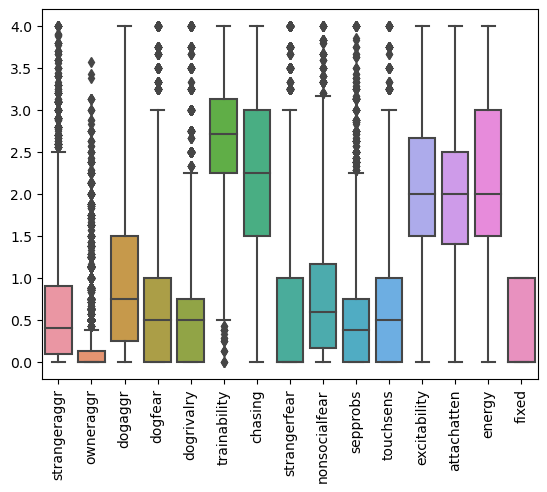

In [7]:
# exploring outliers
    # when using IQR * 1.5, there were thousands of outliers, so I switched to IQR * 2
    
sns.boxplot(data=new_df, whis=2)
plt.xticks(rotation=90)

In [8]:
# calculating outliers for numerical columns

numbers = new_df.iloc[:, 1:15]

for col in numbers.columns:
    q1 = numbers[col].quantile(0.25)
    q3 = numbers[col].quantile(0.75)
    IQR = q3 - q1
    upper_limit = q3 + (IQR * 2)
    lower_limit = q1 - (IQR * 2)
    above = new_df.loc[new_df[col] > upper_limit]
    below = new_df.loc[new_df[col] < lower_limit]
    percentage = (len(above) + len(below)) / 11952 * 100
    print('the upper limit of '+col+' is '+str(upper_limit))
    print('the lower limit of '+col+' is '+str(lower_limit))
    print('the number of upper outliers in ' + col + ' is ' + str(len(above)))
    print('the number of lower outliers in ' + col + ' is ' + str(len(below)))
    print('the percentage of outliers in ' + col + ' is ' + str(percentage))
    print()

the upper limit of strangeraggr is 2.5
the lower limit of strangeraggr is -1.5
the number of upper outliers in strangeraggr is 303
the number of lower outliers in strangeraggr is 0
the percentage of outliers in strangeraggr is 2.535140562248996

the upper limit of owneraggr is 0.375
the lower limit of owneraggr is -0.25
the number of upper outliers in owneraggr is 1257
the number of lower outliers in owneraggr is 0
the percentage of outliers in owneraggr is 10.51706827309237

the upper limit of dogaggr is 4.0
the lower limit of dogaggr is -2.25
the number of upper outliers in dogaggr is 0
the number of lower outliers in dogaggr is 0
the percentage of outliers in dogaggr is 0.0

the upper limit of dogfear is 3.0
the lower limit of dogfear is -2.0
the number of upper outliers in dogfear is 236
the number of lower outliers in dogfear is 0
the percentage of outliers in dogfear is 1.9745649263721552

the upper limit of dogrivalry is 2.25
the lower limit of dogrivalry is -1.5
the number of u

In [9]:
# imputing upper outliers of columns in few_outliers with the IQR * 2 maximum

def change(x, upper_limit, lower_limit):
    if x > upper_limit:
        x = upper_limit
    if x < lower_limit:
        x = lower_limit
    return x

fixed_df = pd.DataFrame()
for col in numbers.columns:
    low = numbers[col].quantile(0.25)
    high = numbers[col].quantile(0.75)
    IQR = high - low
    upper_limit = high + (IQR * 2)
    lower_limit = low - (IQR * 2)
    above = numbers.loc[numbers[col] > upper_limit]
    below = numbers.loc[numbers[col] < lower_limit]
    fixed = numbers[col].apply(change, args=(upper_limit, lower_limit,))
    fixed_df[fixed.name] = fixed

In [10]:
# checking that the outlier replacement worked correctly

for col in fixed_df.columns:
    q1 = fixed_df[col].quantile(0.25)
    q3 = fixed_df[col].quantile(0.75)
    IQR = q3 - q1
    upper_limit = q3 + (IQR * 2)
    lower_limit = q1 - (IQR * 2)
    above = fixed_df.loc[fixed_df[col] > upper_limit]
    below = fixed_df.loc[fixed_df[col] < lower_limit]
    print(len(above))
    print(len(below))
    print()

0
0

0
0

0
0

0
0

0
0

0
0

0
0

0
0

0
0

0
0

0
0

0
0

0
0

0
0



In [11]:
# merging the categorical columns back with the numerical columns of the dataframe

categorical = new_df.loc[:, ['BreedID', 'sex', 'fixed', 'color']]

data = pd.concat([categorical, fixed_df], axis=1)

print(data.head())

                          BreedID sex  fixed   color  strangeraggr  owneraggr  \
0             Mixed Breed/Unknown   F  False   black           0.0        0.0   
1  American Staffordshire Terrier   F   True  yellow           0.0        0.0   
2            Bernese Mountain Dog   M   True     red           0.2        0.0   
3                  Sussex Spaniel   F   True    fawn           0.1        0.0   
4             Mixed Breed/Unknown   M   True    fawn           0.3        0.0   

   dogaggr  dogfear  dogrivalry  trainability  chasing  strangerfear  \
0     0.00      0.0        0.00         3.125     2.25           1.0   
1     0.00      0.0        0.00         1.625     0.00           0.0   
2     0.25      0.0        0.25         2.125     0.50           0.0   
3     0.00      1.0        0.75         2.625     2.75           0.0   
4     0.50      0.0        0.00         2.750     2.00           2.0   

   nonsocialfear  sepprobs  touchsens  excitability  attachatten  energy  
0    

In [12]:
# Finding mixed breed variants
data['BreedID'].loc[data['BreedID'].str.contains('Mix')].unique()

# Change 'Husky Mix' to "Mixed Breed/Unknown" for uniformity among mixed breeds
data.BreedID[data.BreedID == "Husky Mix"] = "Mixed Breed/Unknown"

# check
data['BreedID'].loc[data['BreedID'].str.contains('Mix')].unique()

C:\Users\Guest1\AppData\Local\Temp\ipykernel_18628\97969445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.BreedID[data.BreedID == "Husky Mix"] = "Mixed Breed/Unknown"


array(['Mixed Breed/Unknown'], dtype=object)

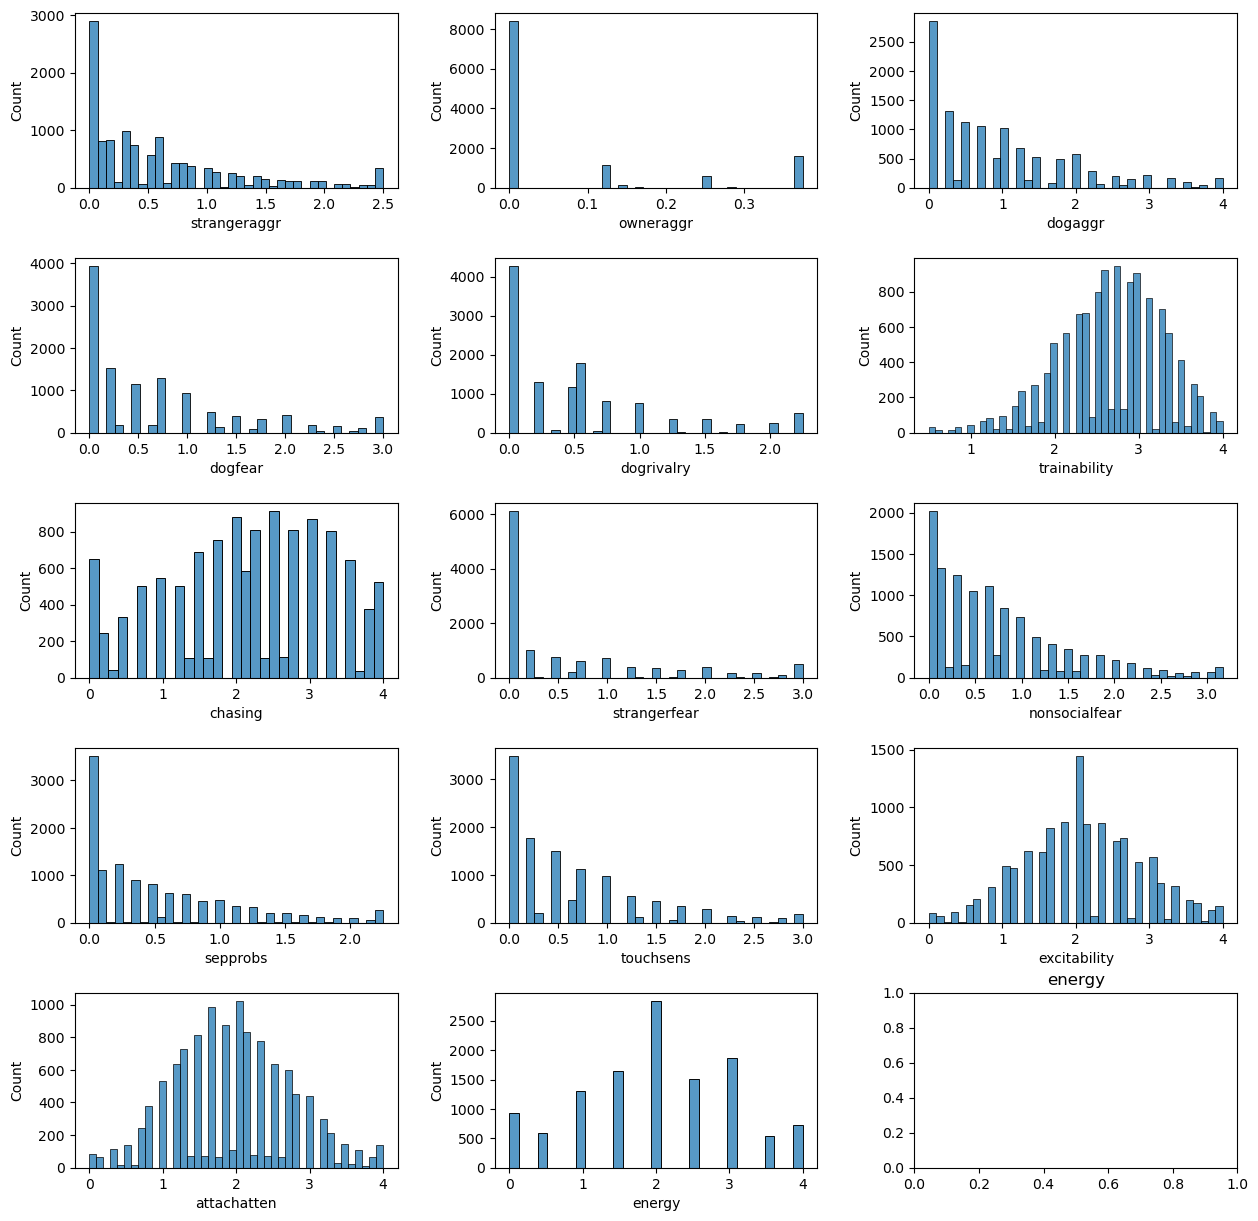

In [13]:
# Investigating distributions of continuous variables with subplots

numerical_df = data.set_index('BreedID').drop(columns=['sex', 'fixed', 'color'])
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
for i, column in enumerate(numerical_df.columns):
    sns.histplot(numerical_df[column],ax=axes[i//3,i%3])
    plt.title(column)
    plt.subplots_adjust(wspace=0.3, hspace=0.4)

plt.savefig('Figures/numerical_distributions')

In [14]:
# Investigating the 'energy' column to see why values seem so separate in its plot
data.energy.unique()

array([2.        , 1.        , 4.        , 3.5       , 1.5       ,
       3.        , 0.        , 0.5       , 2.5       , 2.00230376])

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


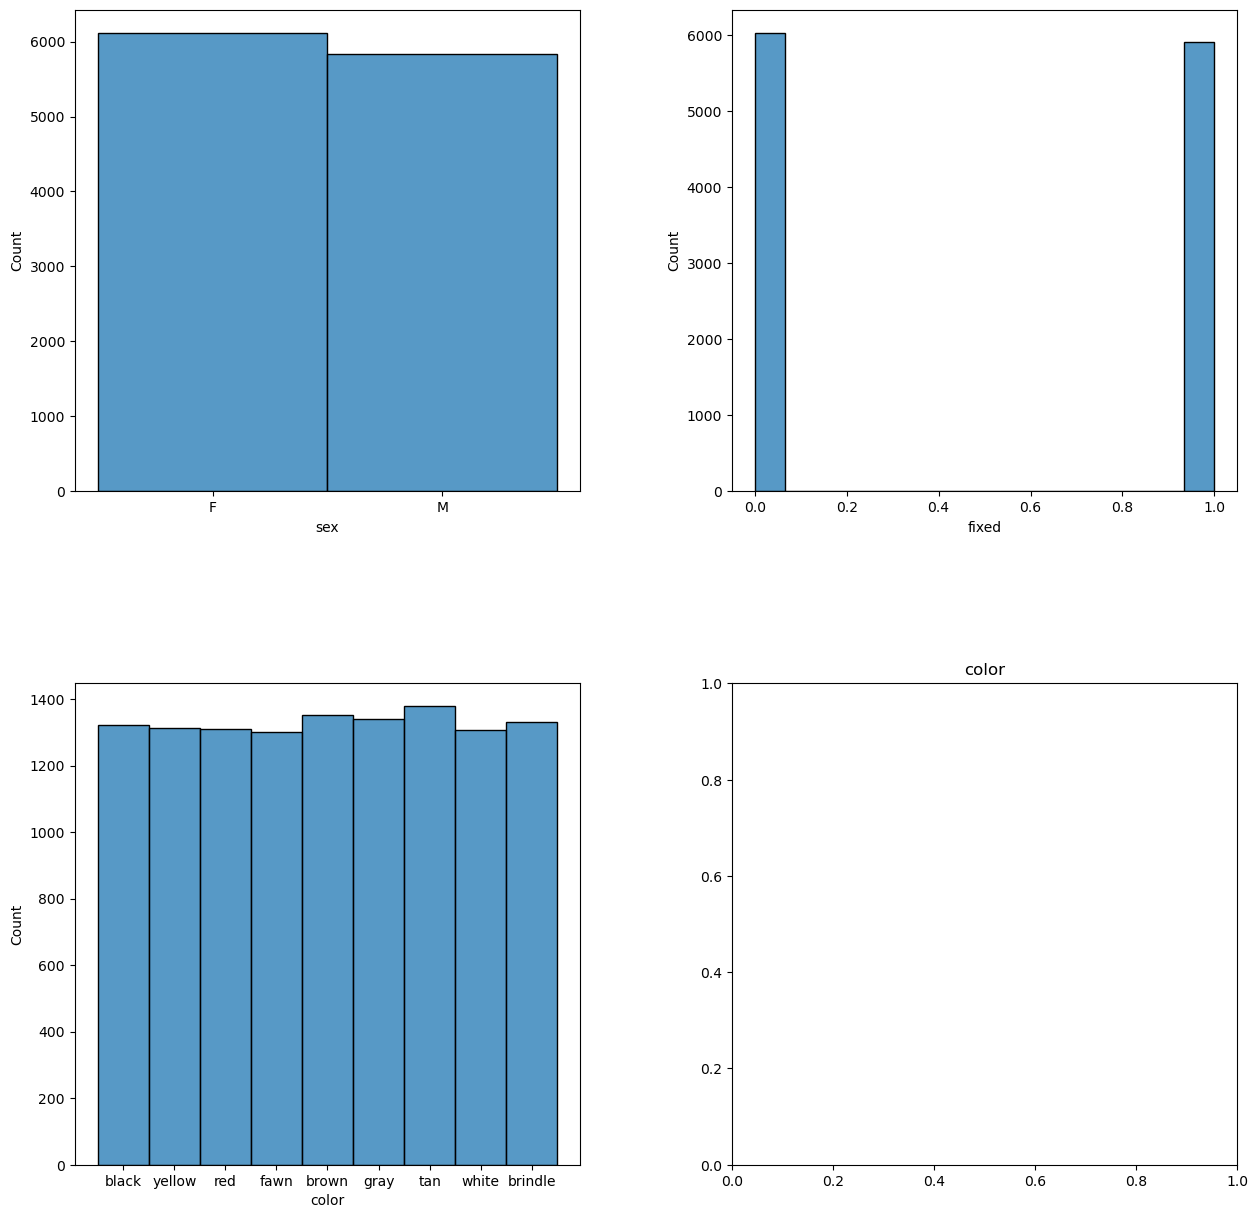

In [15]:
# Time to investigate categorical variables: sex, fixed status, color

numerical = ['strangeraggr', 'owneraggr', 'dogaggr', 'dogfear',
       'dogrivalry', 'trainability', 'chasing', 'strangerfear',
       'nonsocialfear', 'sepprobs', 'touchsens', 'excitability', 'attachatten',
       'energy']
categories = new_df.set_index('BreedID').drop(columns=numerical)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
for i, column in enumerate(categories.columns):
    sns.histplot(categories[column],ax=axes[i//2,i%2])
    plt.title(column)
    plt.subplots_adjust(wspace=0.3, hspace=0.4)

plt.savefig('Figures/categorical_distributions')

In [16]:
# final, cleaned dataframe header and stats

print(data.head())
print(data.describe())

                          BreedID sex  fixed   color  strangeraggr  owneraggr  \
0             Mixed Breed/Unknown   F  False   black           0.0        0.0   
1  American Staffordshire Terrier   F   True  yellow           0.0        0.0   
2            Bernese Mountain Dog   M   True     red           0.2        0.0   
3                  Sussex Spaniel   F   True    fawn           0.1        0.0   
4             Mixed Breed/Unknown   M   True    fawn           0.3        0.0   

   dogaggr  dogfear  dogrivalry  trainability  chasing  strangerfear  \
0     0.00      0.0        0.00         3.125     2.25           1.0   
1     0.00      0.0        0.00         1.625     0.00           0.0   
2     0.25      0.0        0.25         2.125     0.50           0.0   
3     0.00      1.0        0.75         2.625     2.75           0.0   
4     0.50      0.0        0.00         2.750     2.00           2.0   

   nonsocialfear  sepprobs  touchsens  excitability  attachatten  energy  
0    